<a href="https://colab.research.google.com/github/shrad1997/Linear_regression/blob/main/Linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import pandas as pd

In [29]:
data1= pd.read_csv("/content/delivery_time.csv")

In [30]:
data1.head(10)

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [31]:
type(data1)

pandas.core.frame.DataFrame

In [32]:
data1.shape

(21, 2)

In [33]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [46]:
data1['Sorting Time']=data1['Sorting Time'].astype('float64')

In [47]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     float64
dtypes: float64(2)
memory usage: 464.0 bytes


In [48]:
data1

,Delivery Time,Sorting Time
0,21.00,10.0
1,13.50,4.0
2,19.75,6.0
3,24.00,9.0
4,29.00,10.0
5,15.35,6.0
6,19.00,7.0
7,9.50,3.0
8,17.90,10.0
9,18.75,9.0


In [57]:
data1=data1.rename({'Delivery Time':'delivery_time', 'Sorting Time':'sorting_time'},axis=1)

In [58]:
data1

,delivery_time,sorting_time
0,21.00,10.0
1,13.50,4.0
2,19.75,6.0
3,24.00,9.0
4,29.00,10.0
5,15.35,6.0
6,19.00,7.0
7,9.50,3.0
8,17.90,10.0
9,18.75,9.0


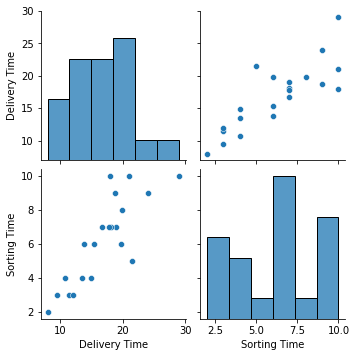

In [49]:
import seaborn as sns
sns.pairplot(data1)

In [50]:
data1.corr() #for finding correlation between dependant and independant variable

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


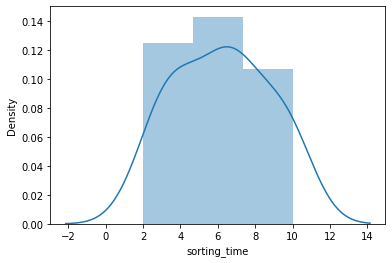

In [59]:
sns.distplot(data1['sorting_time'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


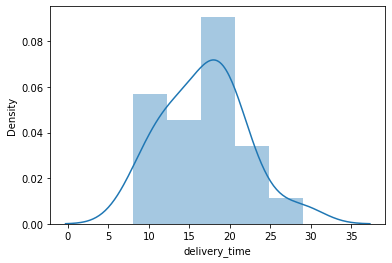

In [60]:
sns.distplot(data1['delivery_time'])

In [62]:
#fitting linear regression model
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
model = smf.ols("delivery_time~sorting_time",data = data1).fit()
model


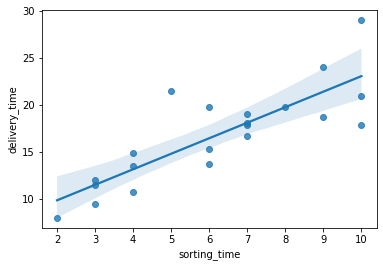

In [64]:
import seaborn as sns
sns.regplot(x="sorting_time",y="delivery_time",data=data1)

In [65]:
model.params

Intercept       6.582734
sorting_time    1.649020
dtype: float64

In [73]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues)    

Intercept       3.823349
sorting_time    6.387447
dtype: float64 
 Intercept       0.001147
sorting_time    0.000004
dtype: float64


In [74]:
#R squared values
(model.rsquared)

0.6822714748417231

In [72]:
#predict for new sorting time
newdata=pd.Series([20,30])


In [75]:
data_pred=pd.DataFrame(newdata,columns=['sorting_time'])

In [76]:
model.predict(data_pred)#predicted delivery time for sorting time 20 and 30 respectively

0    39.563132
1    56.053331
dtype: float64

In [78]:
 6.582734+  1.649020*20 #here sorting_time= 20

39.563134